In [28]:
import numpy as np
import matplotlib.pyplot as plt


In [29]:
def ReadData(file_name):
    x, y = np.loadtxt(file_name, unpack=True)
    return(x,y)

def GenerateMatrix(x, a):
    N = len(x)
    k = len(a)
    funbase=[lambda x: np.ones(np.size(x)),lambda x: x]
    for i in range(k):
        funbase.append((lambda z: lambda x: np.maximum(x-z,0))(a[i]))

    A = np.zeros((N,k+2))
    for j in range(k+2):
        A[:,j] = funbase[j](x)
    
    return A
    
def fHat(A):
    PseudoInvA = np.linalg.pinv(A)
    theta = PseudoInvA@y
    yhat = A@theta
    return yhat

def Residues(y, yhat):
    return (np.linalg.norm(y-yhat)**2)

def MinResidues(x, y, k, max_iter):
    min_residues = float('inf')
    a = []
    # A = []
    yHat = []
    for i in range(max_iter):
        aHat = np.random.uniform(-5, 5, k)
        AHat = GenerateMatrix(x, aHat)
        yStar = fHat(AHat)
        r = Residues(y, yStar)
        if r < min_residues:
            min_residues = r
            a = aHat
            # A = AHat
            yHat = yStar

    return (min_residues, a, yHat)

def PlotData(x, y, yHat, yStar, chart_name):
    plt.figure()
    plt.title(chart_name)
    plt.plot(x, y, 'og', x, yHat, '.b', x, yStar, '.r')

def PlotResult(y, yHat, yStar, chart_name):
    plt.figure()
    plt.title(chart_name)
    plt.scatter(y, yHat)
    plt.scatter(y, yStar)

def BestResidue(residues):
    N = len(residues)
    best_res = float('inf')
    index = 0
    for i in range(N):
        if residues[i] < best_res:
            best_res = residues[i]
            index = i
    return (best_res, index)


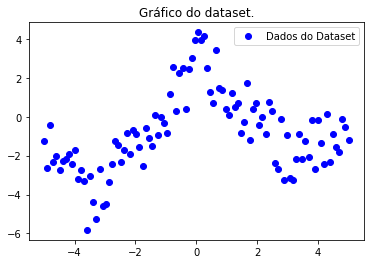

In [30]:
#Leitura dos dados e Gráfico dos dados
file_name = 'ic23dataset11.txt'
x,y = ReadData(file_name)

plt.figure()
plt.plot(x,y,'ob')
plt.title('Gráfico do dataset.')
plt.legend(['Dados do Dataset'])



In [31]:
#Pontos de Esquina Escolhidos após analise do Gráfico
a = np.array([-3, 0]) 
b = np.array([-3, 0, 3])
c = np.array([-3, 0, 2, 3])

Aa = GenerateMatrix(x, a)
Ab = GenerateMatrix(x, b)
Ac = GenerateMatrix(x, c)

yhat_a = fHat(Aa)
yhat_b = fHat(Ab)
yhat_c = fHat(Ac)

r_a = Residues(y, yhat_a)
r_b = Residues(y, yhat_b)
r_c = Residues(y, yhat_c)

In [32]:
# Aqui os pontos de esquina são escolhidos de forma aleatoria 
# É usando uma distribuição uniforme para gerar os pontos de esquina
# após max_iter interações ele escolhe o melhor ponto de esquina

k = [2, 3, 4]
max_iter = 10000
res_aHat, aHat, yHat_aHat= MinResidues(x, y, k[0], max_iter)
res_bHat, bHat, yHat_bHat= MinResidues(x, y, k[1], max_iter)
res_cHat, cHat, yHat_cHat= MinResidues(x, y, k[2], max_iter)


Soma dos quadrados dos resíduos: 133.28231350696646
Soma dos quadrados dos resíduos: 127.14347279177386


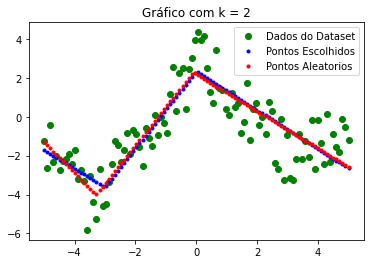

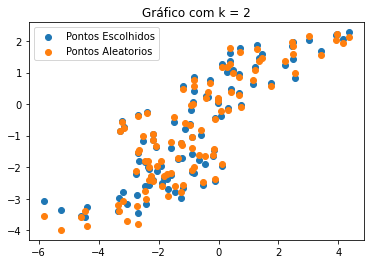

In [33]:
PlotData(x, y, yhat_a, yHat_aHat, 'Gráfico com k = ' + str(k[0]))
plt.legend(['Dados do Dataset','Pontos Escolhidos' ,'Pontos Aleatorios'])


PlotResult(y, yhat_a, yHat_aHat, 'Gráfico com k = ' + str(k[0]))
plt.legend(['Pontos Escolhidos' ,'Pontos Aleatorios'])

print('Soma dos quadrados dos resíduos:', r_a)
print('Soma dos quadrados dos resíduos:', res_aHat)


Soma dos quadrados dos resíduos: 96.08555180891062
Soma dos quadrados dos resíduos: 92.8387339531101


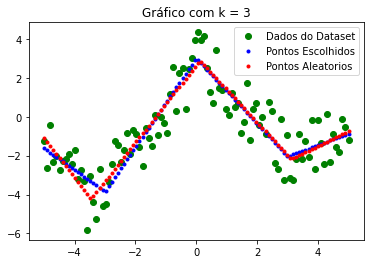

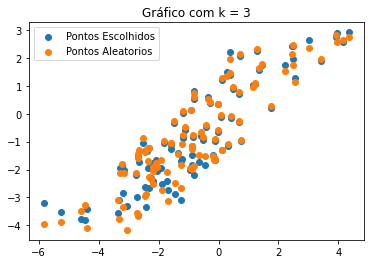

In [34]:
PlotData(x, y, yhat_b, yHat_bHat, 'Gráfico com k = ' + str(k[1]))
plt.legend(['Dados do Dataset','Pontos Escolhidos' ,'Pontos Aleatorios'])


PlotResult(y, yhat_b, yHat_bHat, 'Gráfico com k = ' + str(k[1]))
plt.legend(['Pontos Escolhidos' ,'Pontos Aleatorios'])

print('Soma dos quadrados dos resíduos:', r_b)
print('Soma dos quadrados dos resíduos:', res_bHat)


Soma dos quadrados dos resíduos: 95.94783133768054
Soma dos quadrados dos resíduos: 89.43420115063253


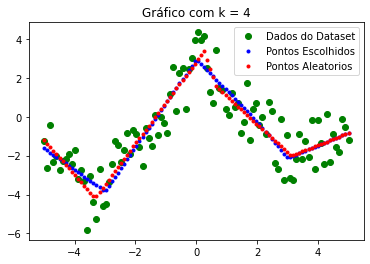

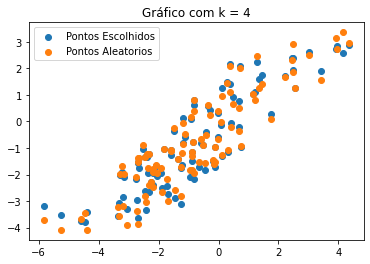

In [35]:
PlotData(x, y, yhat_c, yHat_cHat, 'Gráfico com k = ' + str(k[2]))
plt.legend(['Dados do Dataset','Pontos Escolhidos' ,'Pontos Aleatorios'])

PlotResult(y, yhat_c, yHat_cHat, 'Gráfico com k = ' + str(k[2]))
plt.legend(['Pontos Escolhidos' ,'Pontos Aleatorios'])


print('Soma dos quadrados dos resíduos:', r_c)
print('Soma dos quadrados dos resíduos:', res_cHat)


In [37]:
#Encontrando o melhor r para cada valor de K e comparando com o melhor r dos pontos de esquina escolhidos aleatoriamente.
residues = [r_a, r_b, r_c]
random_residues = [res_aHat, res_bHat, res_cHat]
best_res, ind0 = BestResidue(residues)
best_rand_res, ind1 = BestResidue(random_residues)

best, ind2 = BestResidue([best_res, best_rand_res])


In [41]:
if ind2 == 0:
    k = ind0+2
    print('O melhor valor de r para k = ', k, 'é r = ', best)
    print('Nesse valor de K os pontos de esquina foram escolhidos ao analisar visualmente o gráfico do dadaset.')
else:
    k = ind1 + 2
    print('O melhor valor de r para k =', k, 'é r =', best)
    print('Portando ao rodar o Programa alguns vezes com uma escolha de pontos de esquina de forma aleatoria tem uma chance de coseguir pontos de esquina que faz o valor de r ser melhor do que quando se escolhe os pontos ao analisar visualmente o gráfico')

O melhor valor de r para k = 4 é r = 89.43420115063253
Portando ao rodar o Programa alguns vezes com uma escolha de pontos de esquina de forma aleatoria tem uma chance de coseguir pontos de esquina que faz o valor de r ser melhor do que quando se escolhe os pontos ao analisar visualmente o gráfico
